In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)
#pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install --target=$nb_path 'git+https://github.com/facebookresearch/detectron2.git'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
0


ValueError: ignored

In [ ]:
!pip install cython pyyaml==5.1

#install detectron2:
#!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html




     |████████████████████████████████| 276kB 16.1MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=6e029196694303c5bc5e682c30774f4a8f6ed10fb5033c13062c869c11aef27b
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [10]:
%%time
from google.colab import files

!rm -r frames/
!mkdir frames/

#specify path to video
video = "/content/drive/My Drive/sample.mp4"

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

CPU times: user 33.6 s, sys: 1.06 s, total: 34.7 s
Wall time: 29.7 s


In [11]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

25.0


In [12]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:12, 10.5MB/s]                           


In [ ]:
#read an image  /content/drive
#img = cv2.imread("./frames/30.png")
img = cv2.imread("/content/drive/My Drive/carpark2.jpg")

#pass to the model
outputs = predictor(img)

In [13]:
#read an image  /content/drive
img = cv2.imread("./frames/30.png")
#img = cv2.imread("/content/drive/My Drive/carpark2.jpg")

#pass to the model
outputs = predictor(img)

/content/notebooks/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


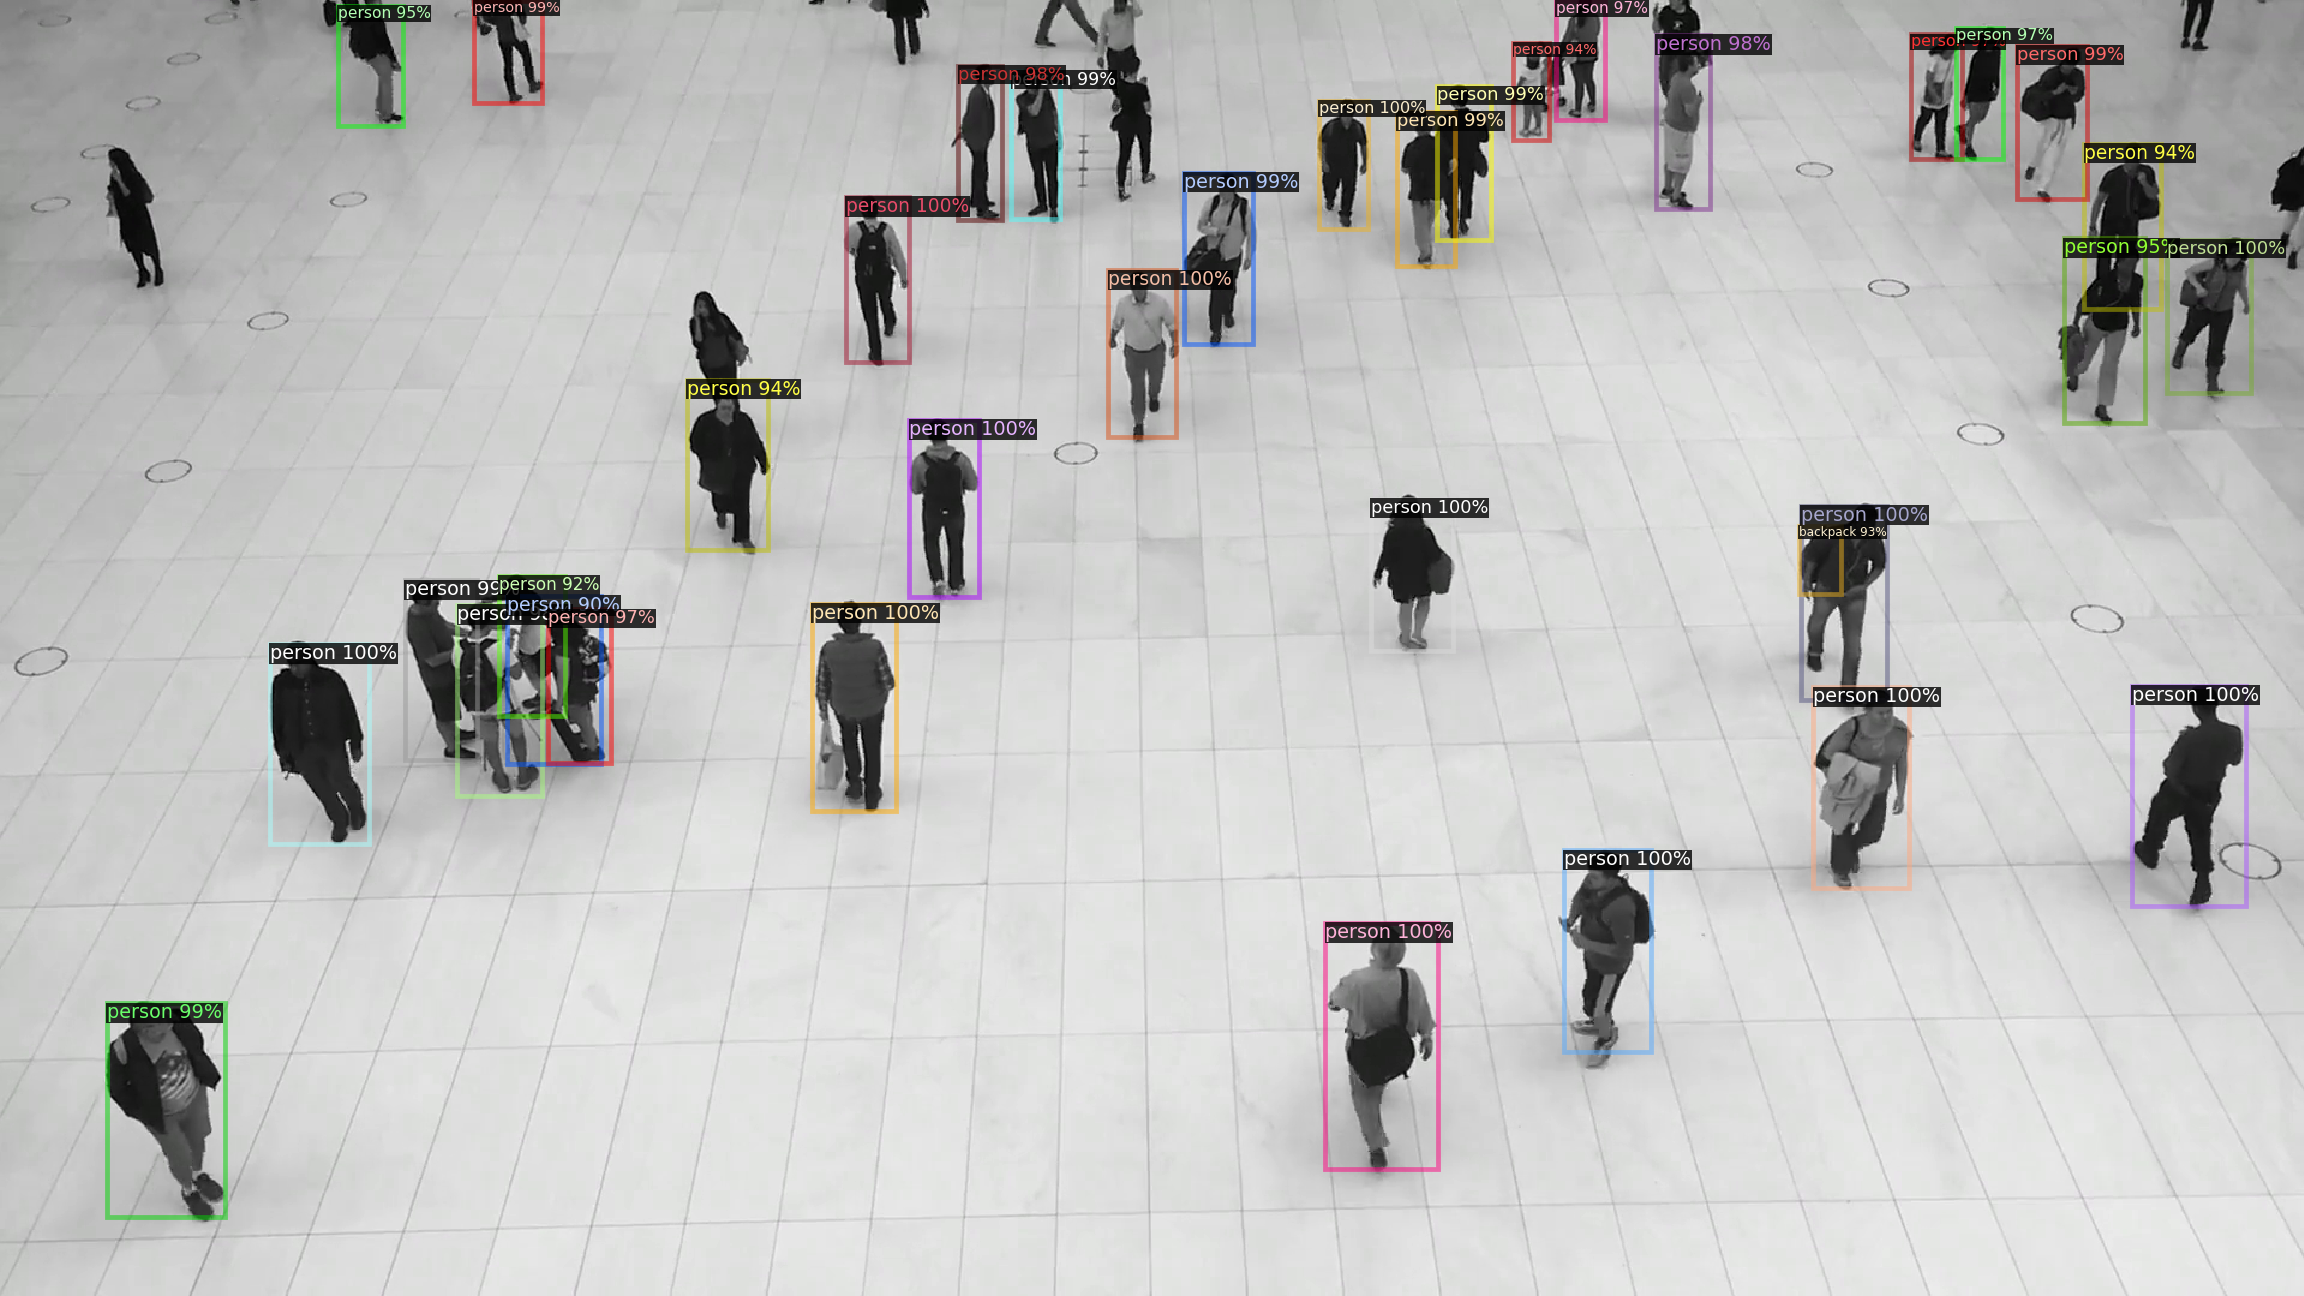

In [14]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [15]:
img = cv2.imread("/content/drive/My Drive/carpark2.jpg")
#cv2_imshow(img)

In [16]:
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 24  0  0]


In [17]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[7.57819824e+02 3.50057373e+02 8.15878357e+02 4.97478363e+02]
 [6.76557312e+02 5.02995880e+02 7.47026245e+02 6.75492493e+02]
 [1.10453943e+03 7.69350098e+02 1.19844373e+03 9.74245972e+02]
 [1.50050391e+03 4.21285797e+02 1.57270129e+03 5.83657471e+02]
 [1.30311902e+03 7.08660889e+02 1.37591638e+03 8.76286255e+02]
 [1.77652954e+03 5.71441650e+02 1.87124597e+03 7.55203064e+02]
 [2.25202850e+02 5.36688477e+02 3.07891632e+02 7.03511658e+02]
 [9.23733582e+02 2.25410110e+02 9.80052856e+02 3.64261475e+02]
 [1.80604919e+03 1.99825516e+02 1.87619580e+03 3.27475128e+02]
 [1.51112476e+03 5.72872192e+02 1.59075916e+03 7.40320496e+02]
 [1.14222815e+03 4.15753479e+02 1.21049719e+03 5.42288269e+02]
 [7.04763367e+02 1.64181915e+02 7.57597229e+02 3.01470947e+02]
 [1.09924292e+03 8.41354065e+01 1.14012207e+03 1.91068817e+02]
 [3.37117371e+02 4.83722778e+02 3.97261047e+02 6.33378723e+02]
 [3.94923706e+02 6.91537201e-01 4.51701355e+02 8.60728531e+01]
 [8.90334854e+01 8.36075317e+02 1.87400253e+02 1.014533

In [18]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [19]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

757.8198 350.05737 815.87836 497.47836


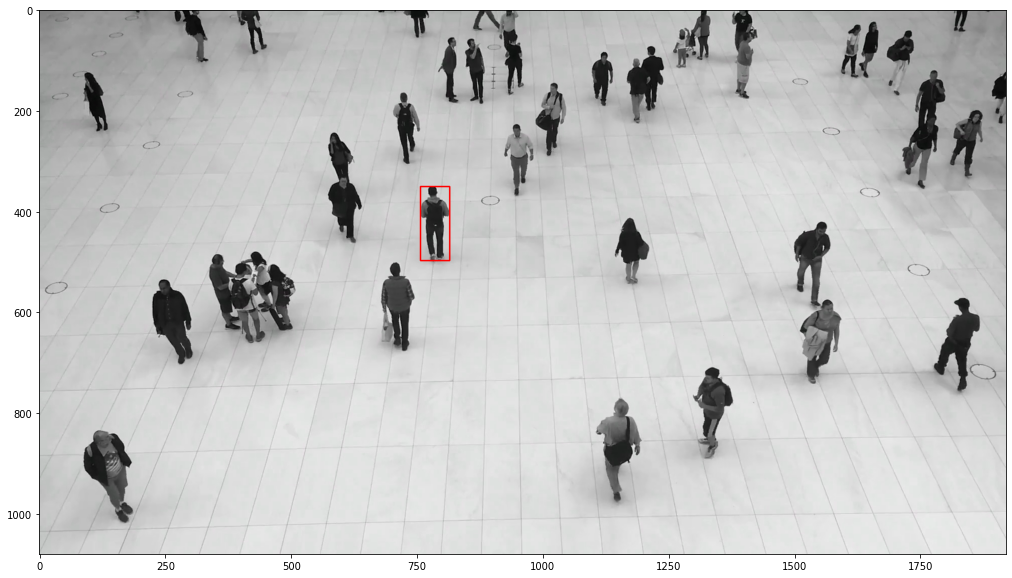

In [20]:
img = cv2.imread('frames/30.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

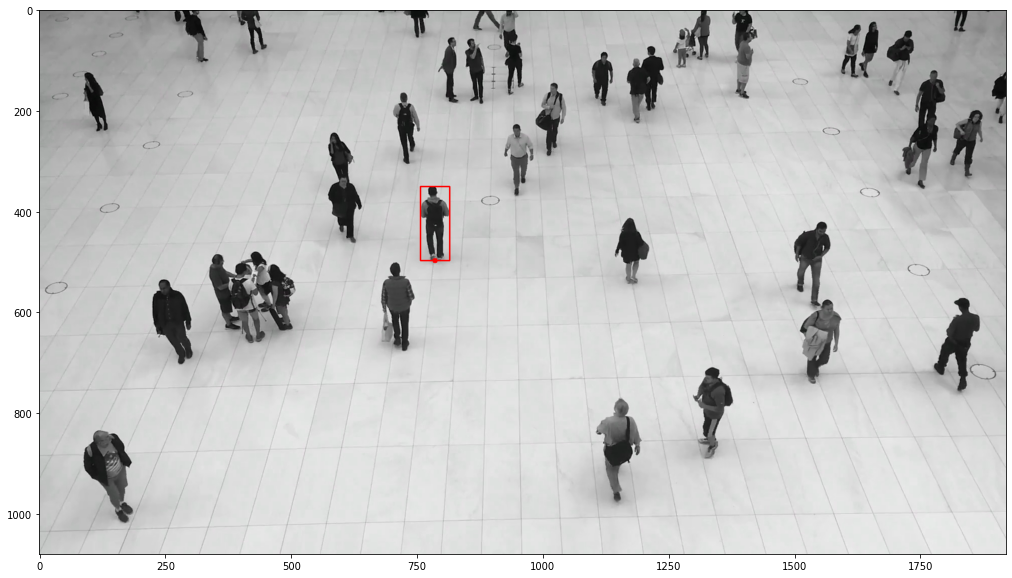

In [21]:
#compute center 
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_ = cv2.circle(img, center, 5, (255, 0, 0), -1)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [22]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

In [23]:
midpoints = [mid_point(img,person,i) for i in range(len(person))]

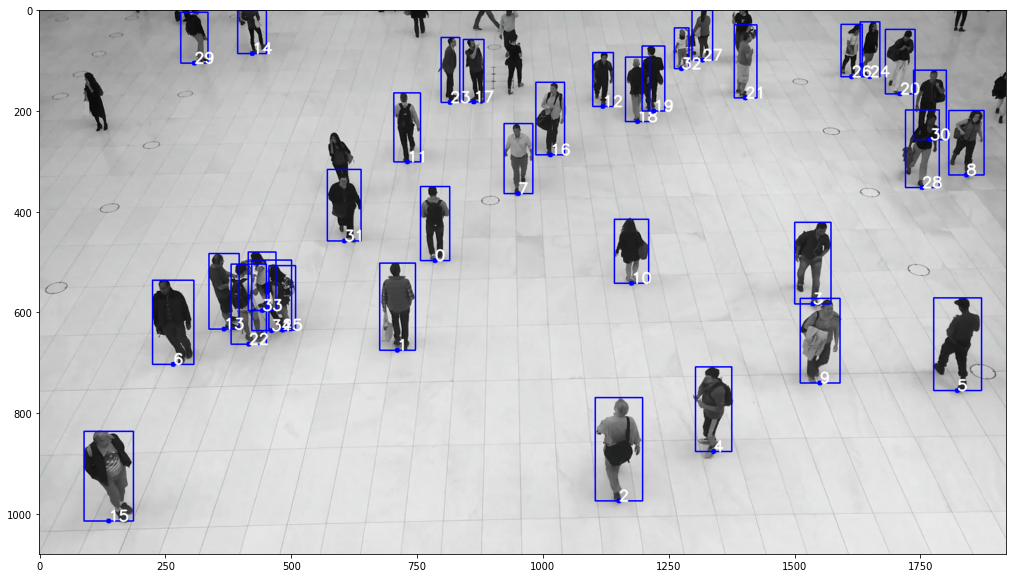

In [24]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [25]:
%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 53 ms, sys: 17.2 ms, total: 70.2 ms
Wall time: 164 ms


In [26]:
dist= compute_distance(midpoints,num)

In [27]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [28]:
import pandas as pd

thresh=100
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

,p1,p2,dist
0,8,28,91.482239
1,12,18,75.239617
2,13,22,57.454330
3,13,33,84.528102
4,13,34,94.047860
5,17,23,47.010637
6,18,19,38.275318
7,20,24,68.963759
8,22,25,72.615425
9,22,33,72.235725


In [29]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

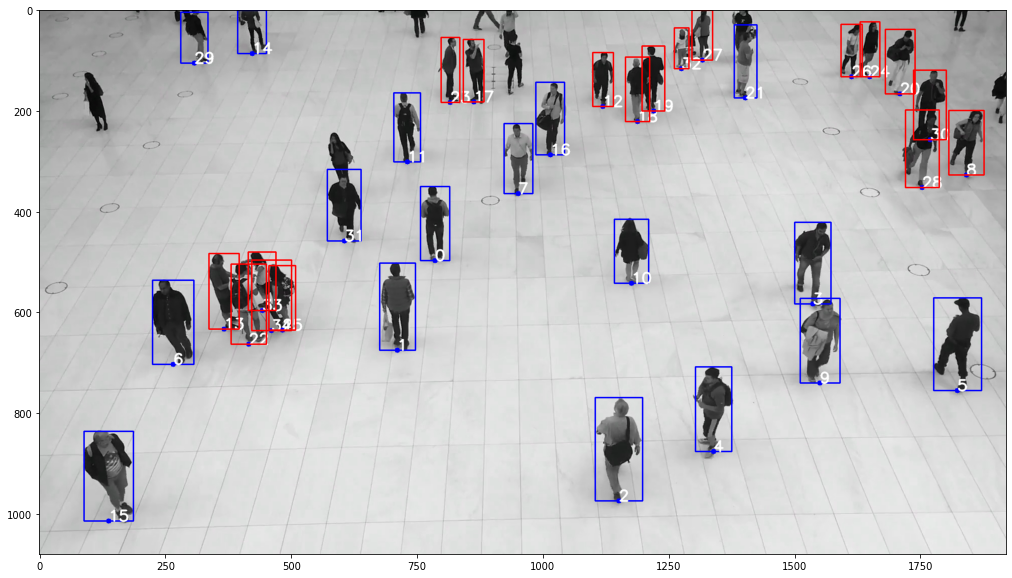

In [30]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [31]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [32]:
# def find_closest_people(name,thresh):

#   img = cv2.imread('frames/'+name)
#   outputs = predictor(img)
#   classes=outputs['instances'].pred_classes.cpu().numpy()
#   bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
#   ind = np.where(classes==0)[0]
#   person=bbox[ind]
#   midpoints = [mid_point(img,person,i) for i in range(len(person))]
#   num = len(midpoints)
#   dist= compute_distance(midpoints,num)
#   p1,p2,d=find_closest(dist,num,thresh)
#   img = change_2_red(img,person,p1,p2)
#   cv2.imwrite('frames/'+name,img)
#   return 0

In [36]:
def find_closest_people2(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return len(person),len(p1)

In [38]:
from tqdm import tqdm
thresh=100
ans= [find_closest_people2(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 340/340 [02:15<00:00,  2.50it/s]


In [41]:
ans

[(35, 16),
 (34, 17),
 (34, 17),
 (34, 17),
 (35, 16),
 (36, 15),
 (35, 12),
 (34, 10),
 (34, 10),
 (35, 12),
 (34, 10),
 (34, 10),
 (34, 10),
 (34, 10),
 (34, 10),
 (34, 10),
 (35, 12),
 (34, 13),
 (32, 12),
 (35, 13),
 (34, 13),
 (33, 15),
 (35, 17),
 (37, 20),
 (36, 20),
 (36, 19),
 (35, 16),
 (35, 16),
 (35, 17),
 (35, 18),
 (35, 17),
 (35, 18),
 (35, 20),
 (36, 21),
 (34, 17),
 (37, 19),
 (38, 23),
 (36, 18),
 (34, 14),
 (36, 19),
 (37, 19),
 (38, 20),
 (37, 19),
 (37, 18),
 (37, 16),
 (37, 16),
 (38, 18),
 (38, 18),
 (38, 18),
 (38, 18),
 (38, 18),
 (39, 18),
 (39, 17),
 (38, 18),
 (38, 18),
 (39, 19),
 (38, 18),
 (37, 14),
 (38, 16),
 (37, 13),
 (38, 16),
 (37, 17),
 (37, 16),
 (37, 16),
 (36, 16),
 (39, 18),
 (39, 16),
 (40, 18),
 (38, 15),
 (39, 16),
 (37, 13),
 (39, 15),
 (40, 15),
 (39, 14),
 (38, 14),
 (37, 13),
 (39, 15),
 (38, 15),
 (38, 15),
 (38, 16),
 (39, 16),
 (37, 16),
 (37, 16),
 (37, 15),
 (37, 14),
 (39, 13),
 (37, 11),
 (36, 11),
 (39, 13),
 (38, 13),
 (39, 14),

In [ ]:
# from tqdm import tqdm
# thresh=100
# _ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 583/583 [04:48<00:00,  2.02it/s]


In [39]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('sample_output3.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 20.5 s, sys: 819 ms, total: 21.3 s
Wall time: 20.8 s


In [ ]:
from google.colab import files
files.download('sample_output3.mp4') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>